In [1]:
!pip install pystac_client

In [2]:
import pystac
items = pystac.ItemCollection.from_file("results.json")

In [3]:
import rioxarray
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["B09"].href)

In [4]:
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

EPSG:32631
0
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


In [6]:
raster_ams_b9.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

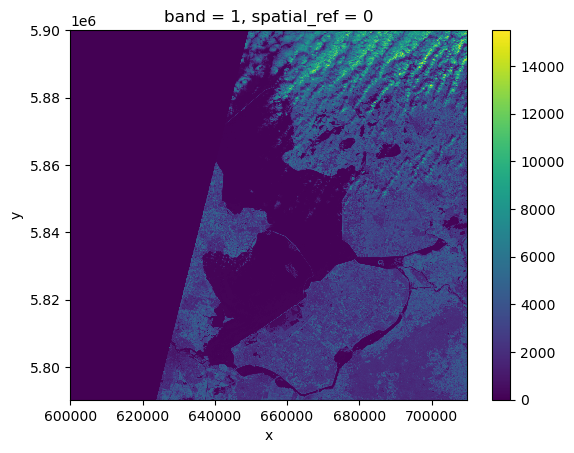

In [7]:
raster_ams_b9.plot()

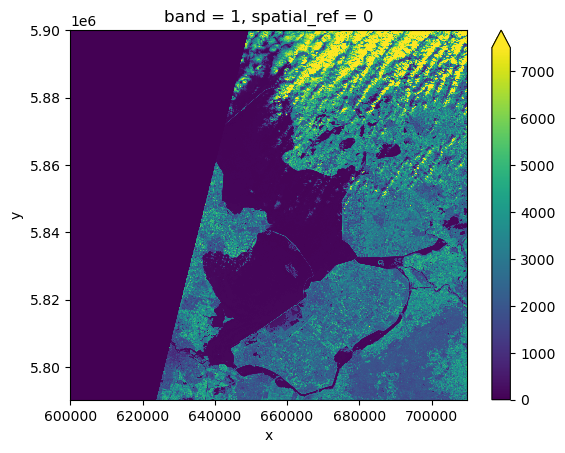

In [8]:
raster_ams_b9.plot(robust=True)

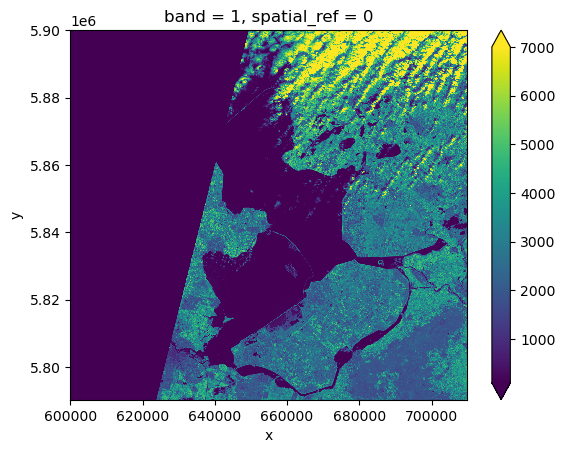

In [9]:
raster_ams_b9.plot(vmin=100, vmax=7000)

In [10]:
print(raster_ams_b9.rio.crs)

EPSG:32631


In [12]:
epsg = raster_ams_b9.rio.crs.to_epsg()

In [15]:
from pyproj import CRS
crs = CRS(epsg)
crs

<Derived Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [17]:
# Exercise: find the axes units of the CRS
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> Dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [18]:
dir(crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [21]:
[v.unit_name for v in crs.axis_info]

['metre', 'metre']

In [22]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15497, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2049.16447495)
Coordinates:
    spatial_ref  int64 0


In [25]:
print(raster_ams_b9.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([   0., 2911.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [26]:
import numpy as np

print(np.percentile(raster_ams_b9, 25))
print(np.percentile(raster_ams_b9, 75))

0.0
2911.0


In [27]:
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["B09"].href, masked=True)

In [28]:
raster_ams_b9.where(raster_ams_b9 != raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [29]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(8., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15497., dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2477.405, dtype=float32)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2061.9539, dtype=float32)
Coordinates:
    spatial_ref  int64 0


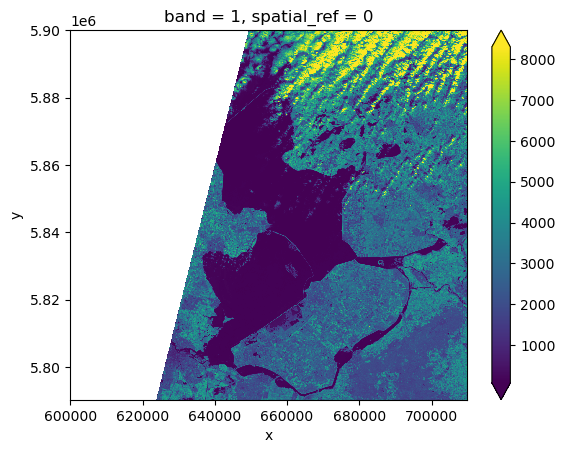

In [32]:
raster_ams_b9.plot(robust=True)

In [33]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets["overview"].href)
raster_ams_overview

<xarray.DataArray (band: 3, y: 343, x: 343)>
[352947 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.002e+05 6.005e+05 ... 7.093e+05 7.096e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.899e+06 ... 5.791e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [34]:
raster_ams_overview.shape

(3, 343, 343)

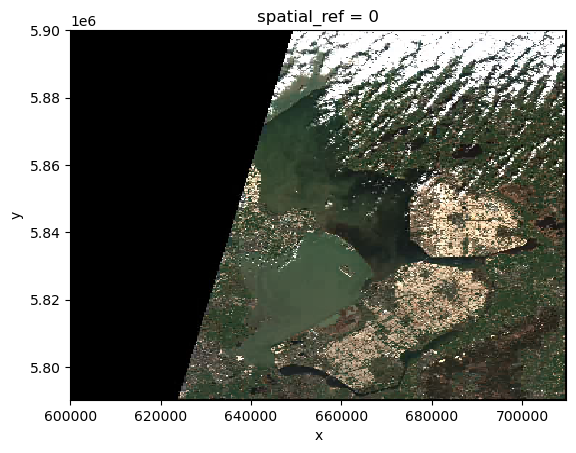

In [35]:
raster_ams_overview.plot.imshow()

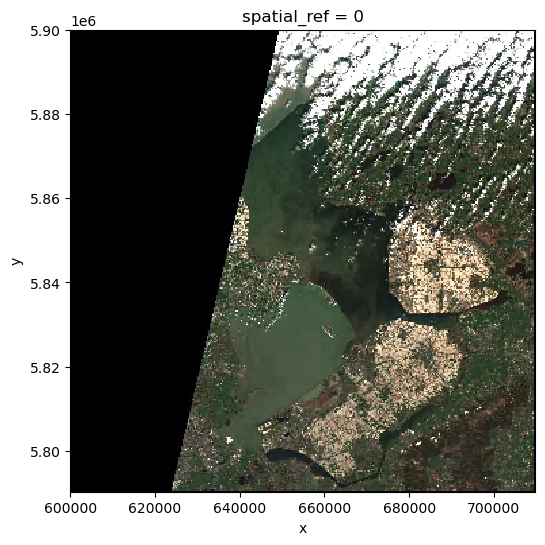

In [41]:
# Exercise: set the plotting aspect ratio
raster_ams_overview.plot.imshow(size=6, aspect=1)